# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!unzip /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency.zip -d /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/

Archive:  /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency.zip
   creating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/102013492.png  
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/150-Sweet-And-Short-Indian-Baby-Girl-Names-With-Meanings-624x702.jpg  
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detect

# CNN Model for detecting Iodine Deficiency

In [ ]:
dataset_dir = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency"

In [ ]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [ ]:
dataset_dir

PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency')

In [ ]:
list(dataset_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (154).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (139).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (149).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (115).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_M

In [ ]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))

In [ ]:
print(image_count)

207


In [ ]:
healthy = len(list(dataset_dir.glob('healthy/*')))

In [ ]:
healthy

164

In [ ]:
iodine_deficiency = len(list(dataset_dir.glob('iodine_deficiency/*')))

In [ ]:
iodine_deficiency

114

In [ ]:
healthy_img_list = list(dataset_dir.glob('healthy/*'))

In [ ]:
healthy_img_list[:10]

[PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (154).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (139).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (149).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (115).jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_M

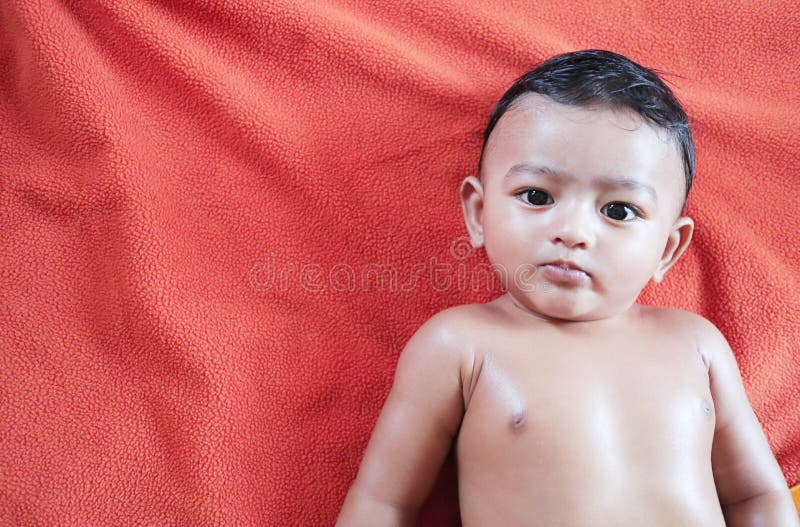

In [ ]:
PIL.Image.open(healthy_img_list[0])

In [ ]:
iodine_deficiency_img_list = list(dataset_dir.glob('iodine_deficiency/*'))

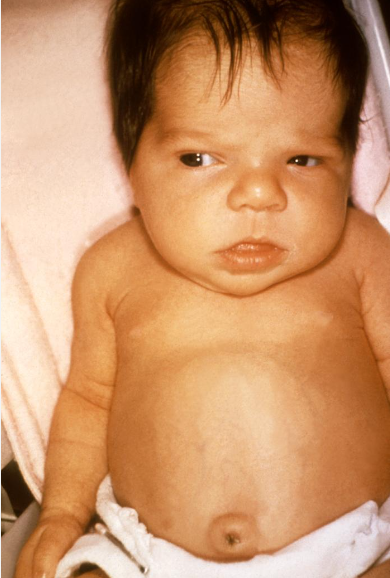

In [ ]:
PIL.Image.open(str(iodine_deficiency_img_list[5]))

In [ ]:
iodine_deficiency_paths_dict = {
    "healthy" : list(dataset_dir.glob('healthy/*')),
    "iodine_deficiency" : list(dataset_dir.glob('iodine_deficiency/*'))
}

In [ ]:
iodine_deficiency_labels_dict = {
    "healthy" : 0,
    "iodine_deficiency" : 1
}

In [ ]:
iodine_deficiency_paths_dict['healthy'][10]

PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (150).jpg')

In [ ]:
str(iodine_deficiency_paths_dict['healthy'][10])

'/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/iodine_deficiency/healthy/healthy_baby (150).jpg'

In [ ]:
healthy_img = cv2.imread(str(iodine_deficiency_paths_dict['healthy'][7]))
healthy_img

array([[[215, 227, 251],
        [215, 227, 251],
        [215, 227, 251],
        ...,
        [209, 222, 244],
        [209, 222, 244],
        [209, 222, 244]],

       [[214, 225, 252],
        [213, 226, 252],
        [214, 225, 252],
        ...,
        [213, 226, 248],
        [213, 226, 248],
        [213, 226, 248]],

       [[211, 223, 251],
        [209, 223, 251],
        [211, 223, 251],
        ...,
        [210, 223, 245],
        [210, 223, 245],
        [210, 223, 245]],

       ...,

       [[227, 234, 253],
        [227, 234, 253],
        [227, 234, 253],
        ...,
        [220, 232, 250],
        [220, 232, 250],
        [219, 231, 249]],

       [[227, 234, 253],
        [227, 234, 253],
        [227, 234, 253],
        ...,
        [219, 231, 249],
        [219, 231, 249],
        [219, 231, 249]],

       [[226, 234, 251],
        [226, 234, 251],
        [226, 234, 251],
        ...,
        [219, 231, 249],
        [219, 231, 249],
        [218, 230, 248]]

In [ ]:
print(healthy_img.shape)

(183, 275, 3)


In [ ]:
cv2.resize(healthy_img, (180, 180)).shape

(180, 180, 3)

In [ ]:
for healthy_deficient_category, images_path in iodine_deficiency_paths_dict.items():
    print(healthy_deficient_category)
    print(len(images_path))

healthy
164
iodine_deficiency
114


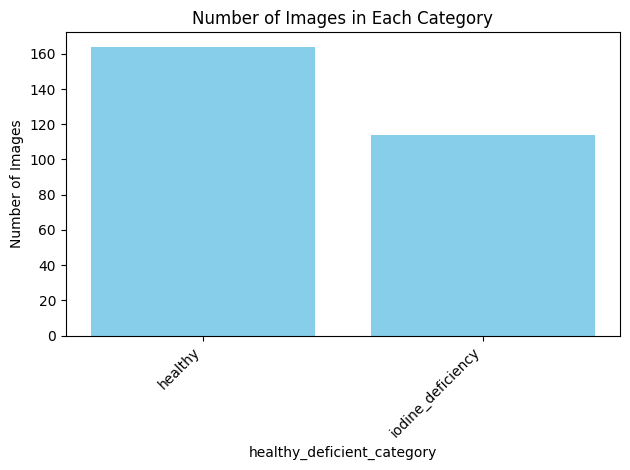

In [ ]:
import matplotlib.pyplot as plt

skin_categories = ['healthy', 'iodine_deficiency']
image_counts = [164, 114]

# Plotting the bar chart
plt.bar(skin_categories, image_counts, color='skyblue')
plt.xlabel('healthy_deficient_category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Showing the plot
plt.show()

In [ ]:
X, y = [], []

for healthy_deficient_category, images_path in iodine_deficiency_paths_dict.items():
    for image_path in images_path:
        img = cv2.imread(str(image_path))
        try:
          resized_img = cv2.resize(img, (180, 180))
          X.append(resized_img)
          y.append(iodine_deficiency_labels_dict[healthy_deficient_category])
        except:
          continue

In [ ]:
X = np.array(X)
y = np.array(y)

# Splitting the dataset (80 % - Train, 20 % - Test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
len(X_train)

221

In [ ]:
len(X_test)

56

In [ ]:
X_train[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# Scaling the numpy arrays representing the images in the training & testing dataset (Just divide X_train & X_test by 255, after that all the values that you would have in the arrays would be between 0 to 1 & not 0 to 255 as they were before scaling)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[1].shape

(180, 180, 3)

In [ ]:
X_test_scaled[1].shape

(180, 180, 3)

# Training the CNN Model

In [ ]:
num_classes = 2

model = Sequential([
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 2 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'healthy' & similarly the activation of the other neuron would indicate the class being 'iodine deficiency'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
7/7 [==============================] - 6s 232ms/step - loss: 1.0071 - accuracy: 0.5837 - val_loss: 0.6474 - val_accuracy: 0.5357
Epoch 2/100
7/7 [==============================] - 0s 29ms/step - loss: 0.5586 - accuracy: 0.7014 - val_loss: 0.4926 - val_accuracy: 0.6429
Epoch 3/100
7/7 [==============================] - 0s 28ms/step - loss: 0.4236 - accuracy: 0.8235 - val_loss: 0.4180 - val_accuracy: 0.6964
Epoch 4/100
7/7 [==============================] - 0s 35ms/step - loss: 0.2822 - accuracy: 0.9095 - val_loss: 0.2296 - val_accuracy: 0.9464
Epoch 5/100
7/7 [==============================] - 0s 40ms/step - loss: 0.1961 - accuracy: 0.9367 - val_loss: 0.2141 - val_accuracy: 0.8571
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 0.1372 - accuracy: 0.9729 - val_loss: 0.1331 - val_accuracy: 0.9643
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.3009 - val_accuracy: 0.8571
Epoch 8/100
7/7 [==

# Healthy & Iodine deficient baby CNN Model Graphs & Model Architecture

### Training & Validation Data Loss & Accuracy Graphs of the CNN model developed for predicting Healthy & Iodine deficient baby

### Model Architecture diagram

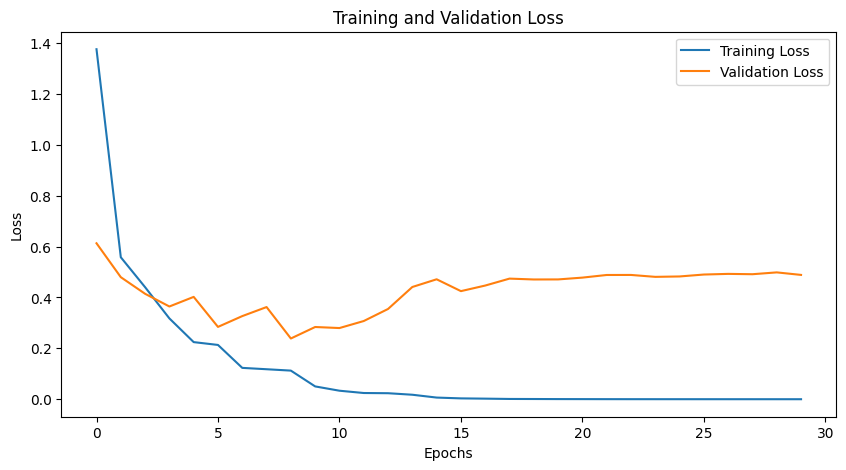

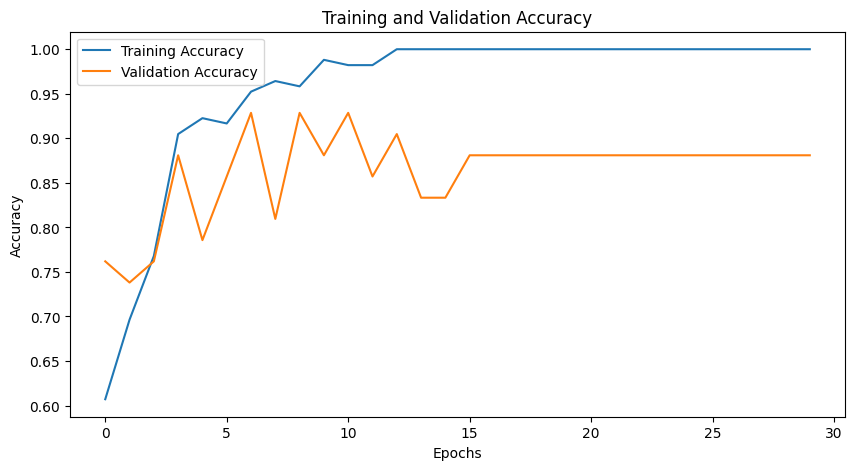

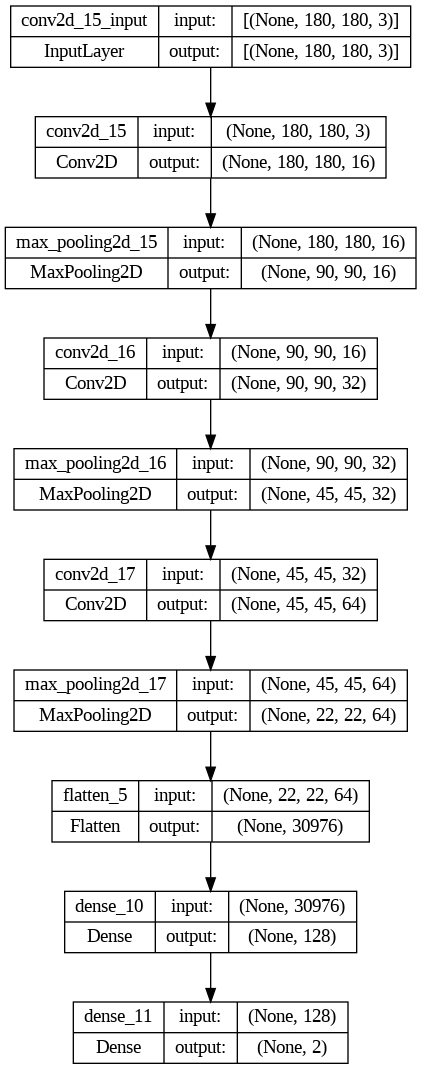

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 13ms/step - loss: 0.4885 - accuracy: 0.8810


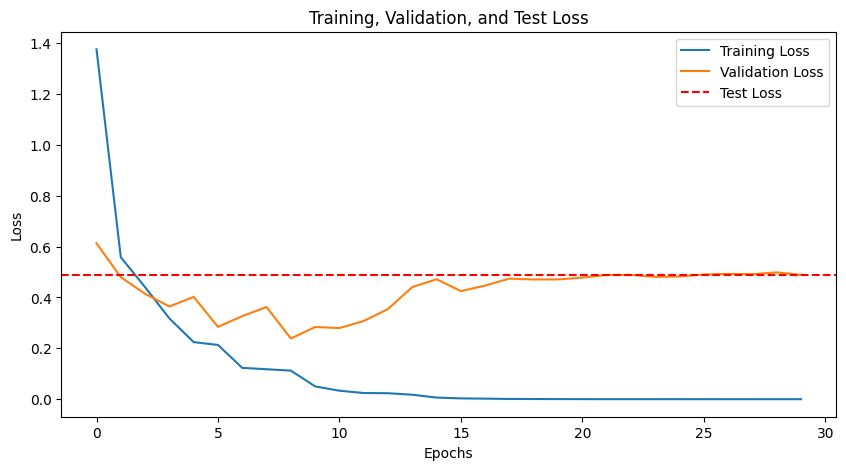

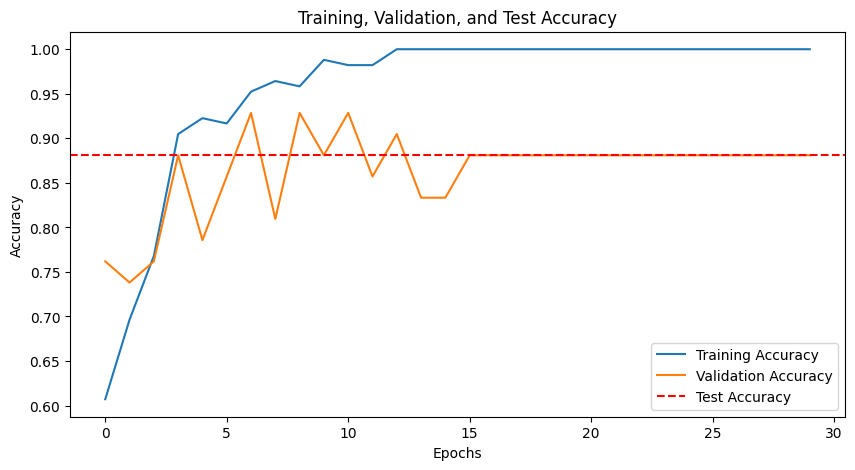

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 88.10 % Accuracy has been obtained for the CNN model trained for predicting Healthy & Iodine deficient baby on test data

2/2 [==============================] - 0s 7ms/step


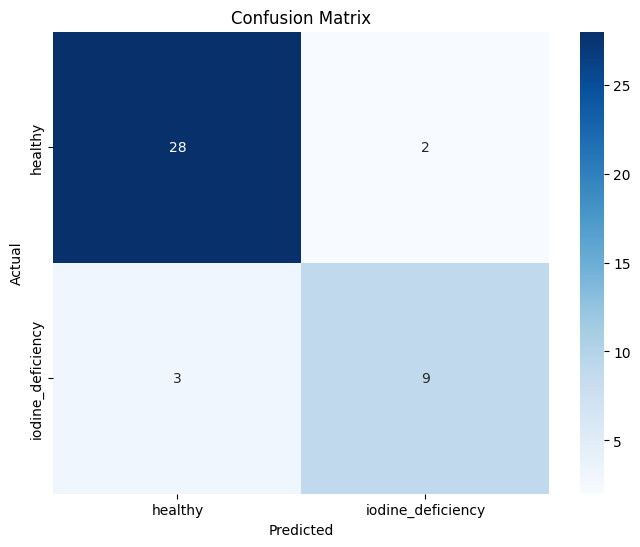

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iodine_deficiency_labels_dict.keys(),
            yticklabels=iodine_deficiency_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predictions for the entire test dataset, showing the the confidence score (possibilities) of every sample / image of the test dataset belonging to the 2 different classes that we have in our Dry & Healthy Skin dataset.

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

2/2 [==============================] - 0s 7ms/step


array([[-3.14136958e+00, -1.63988245e+00],
       [ 2.12328968e+01, -1.69548473e+01],
       [ 3.00418282e+00, -2.78289866e+00],
       [ 4.61336231e+00, -3.35483956e+00],
       [-7.17846966e+00,  4.47391415e+00],
       [-1.32940829e+00,  6.06062114e-01],
       [ 1.16521015e+01, -1.03107510e+01],
       [ 5.26944590e+00, -3.91440010e+00],
       [ 1.13891878e+01, -1.00670433e+01],
       [-2.53308509e-02, -1.60016239e+00],
       [ 2.57862988e+01, -1.97827435e+01],
       [-2.43576574e+00,  8.86254787e-01],
       [ 4.33344793e+00, -2.65982366e+00],
       [-7.70134926e+00,  4.24940586e+00],
       [ 2.13402405e+01, -1.62394543e+01],
       [ 8.98951721e+00, -8.20813847e+00],
       [-1.41085167e+01,  8.54577065e+00],
       [ 7.27015495e+00, -7.08163404e+00],
       [ 9.33897436e-01, -4.67756557e+00],
       [ 1.03139009e+01, -6.83406448e+00],
       [ 2.55641818e+00, -2.33085680e+00],
       [ 6.42133331e+00, -4.27764130e+00],
       [ 1.08530254e+01, -9.45829773e+00],
       [ 1.

# Checking the class of the 31st sample in the test dataset

# Converting the scores of the predictions for the 31st sample of the test dataset into probability scores using softmax

In [ ]:
score = tf.nn.softmax(predictions[30])
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.96563673, 0.03436324], dtype=float32)>

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[30]

0

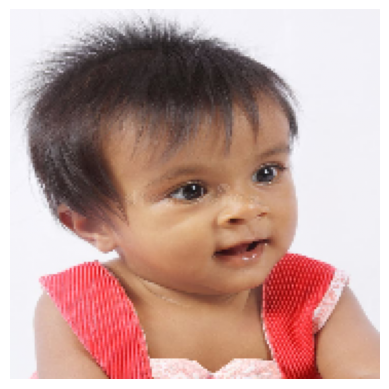

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(X_test_scaled[30][:, :, ::-1])  # Reversing the order (BGR to RGB) for display
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

# The baby in the above image is a healthy baby, so the prediction made for 31st image which was class index 0 (healthy) in the test dataset is correct

# Number of images & labels in the test dataset (X_test_scaled (test image) & y_test (test image label))

In [ ]:
X_test_scaled.shape

(42, 180, 180, 3)

In [ ]:
y_test.shape

(42,)

# The test dataset contains 42 images numbered with numbers from 0 to 41

In [ ]:
input_test_image = int(input("Enter a number between 0 and 42 (excluding 42), this number represents which sample image you want to pick from the test dataset : "))

Enter a number between 0 and 42 (excluding 42), this number represents which sample image you want to pick from the test dataset : 13


Predicted Index: 1
Actual Index: 1
Predicted Class Name: iodine_deficiency


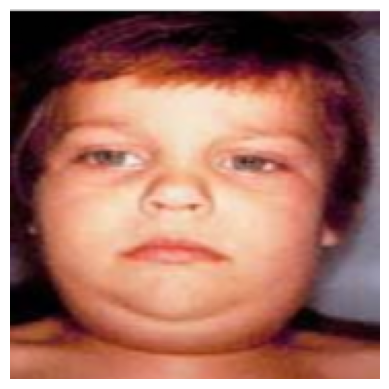

In [ ]:
# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = y_test[input_test_image]

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in iodine_deficiency_labels_dict.items() if index == predicted_index][0]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in iodine_deficiency_labels_dict.items() if index == actual_index][0]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the BGR image using Matplotlib
plt.imshow(X_test_scaled[input_test_image][:, :, ::-1])  # Reverse the order (BGR to RGB) for display
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


# As we can see in the above generated output the image at index 13 (which means the 14th image in the test dataset) is a iodine deficient baby's image & it's actual & predicted class index are the same which is 1 (which means iodine deficiency class), so the prediction made by the created CNN model is correct

# Saving the created CNN model for which we obtained 88.10 % accuracy on test data

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/iodine_deficiency_CNN_model/'

In [ ]:
# Save the model
model.save(save_model_folder + 'healthy_iodine_deficient_classification_first_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the saved CNN model

In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/iodine_deficiency_CNN_model/healthy_iodine_deficient_classification_first_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)


# Using the saved model after loading it to make predictions on unseen image

# Downloading an image from google to test the model

In [ ]:
!pip install requests

In [ ]:
import requests
from google.colab import drive

# URL of the image to download
image_url = 'https://img.medscapestatic.com/pi/meds/ckb/09/43309tn.jpg'

# Define the path to your desired folder in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/'

# Send a GET request to download the image
response = requests.get(image_url)

# Save the image to your Google Drive folder
with open(image_path + 'iodine_deficient_baby_image_2.jpg', 'wb') as f:
    f.write(response.content)


# Use the loaded model to predict the class of the image downloaded from the internet

In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/iodine_deficient_baby_image_2.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in iodine_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 369ms/step
Predicted Class: iodine_deficiency


# Displaying the downloaded image for which the class was predicted using the created CNN model

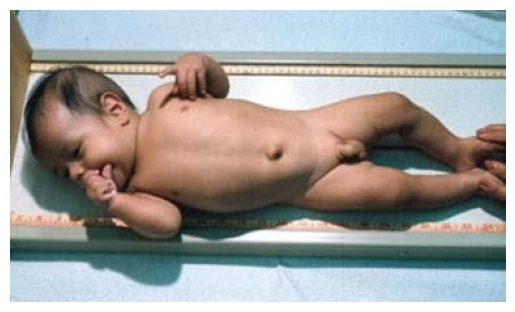

In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/iodine_deficient_baby_image_2.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# As we can see the image that was downloaded is of a baby with iodine deficiency & the prediction obtained for this image using our CNN Model is also iodine_deficiency, This demonstrates the effectiveness of the created CNN model in distinguishing between healthy & iodine deficient babies

<hr>
<hr>

In [ ]:
img_height = 180
img_width = 180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 2

model = Sequential([
  data_augmentation, # the first layer is augmentation which produces new samples
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Dropout(0.2), # The dropout layer would drop 20 % of the neurons at random from every layer in each pass, giving us better generalisation so that we can avoid overfitting
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 4 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'marigold_fresh' & similarly the activation of the other 3 neurons would indicate the class being 'marigold_decayed', 'hibiscus_fresh', 'hibiscus_decayed'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=60, validation_data=(X_test_scaled, y_test))

Epoch 1/60
7/7 [==============================] - 3s 84ms/step - loss: 1.0628 - accuracy: 0.5204 - val_loss: 0.6878 - val_accuracy: 0.5536
Epoch 2/60
7/7 [==============================] - 0s 36ms/step - loss: 0.6641 - accuracy: 0.6154 - val_loss: 0.6766 - val_accuracy: 0.5357
Epoch 3/60
7/7 [==============================] - 0s 36ms/step - loss: 0.6321 - accuracy: 0.6018 - val_loss: 0.6371 - val_accuracy: 0.5357
Epoch 4/60
7/7 [==============================] - 0s 34ms/step - loss: 0.6111 - accuracy: 0.6290 - val_loss: 0.5806 - val_accuracy: 0.7321
Epoch 5/60
7/7 [==============================] - 0s 33ms/step - loss: 0.6079 - accuracy: 0.6652 - val_loss: 0.5627 - val_accuracy: 0.6607
Epoch 6/60
7/7 [==============================] - 0s 34ms/step - loss: 0.5276 - accuracy: 0.7376 - val_loss: 0.3697 - val_accuracy: 0.8571
Epoch 7/60
7/7 [==============================] - 0s 41ms/step - loss: 0.4900 - accuracy: 0.7692 - val_loss: 0.2946 - val_accuracy: 0.8929
Epoch 8/60
7/7 [===========

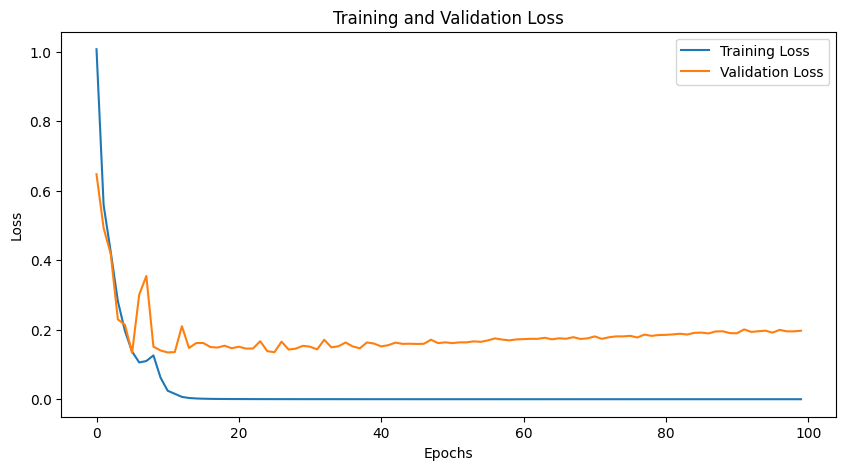

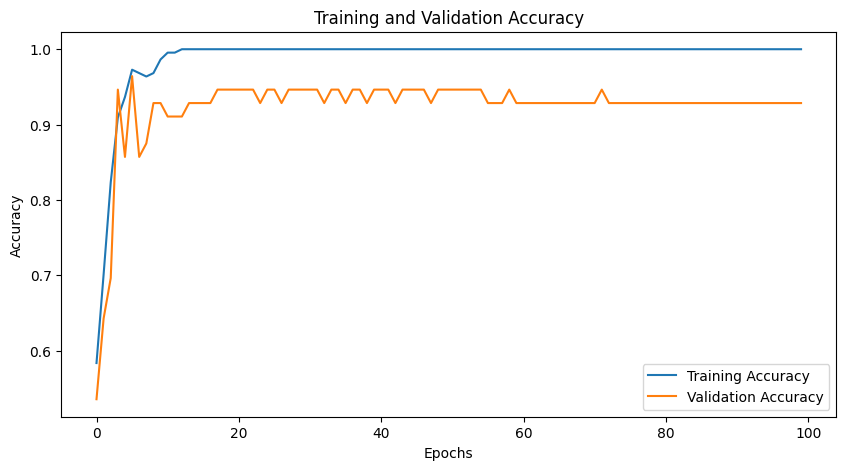

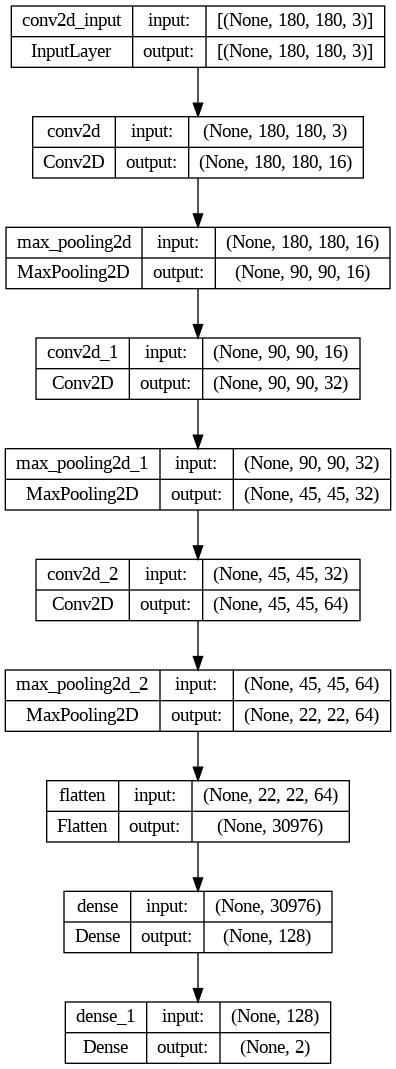

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 13ms/step - loss: 0.3040 - accuracy: 0.9464


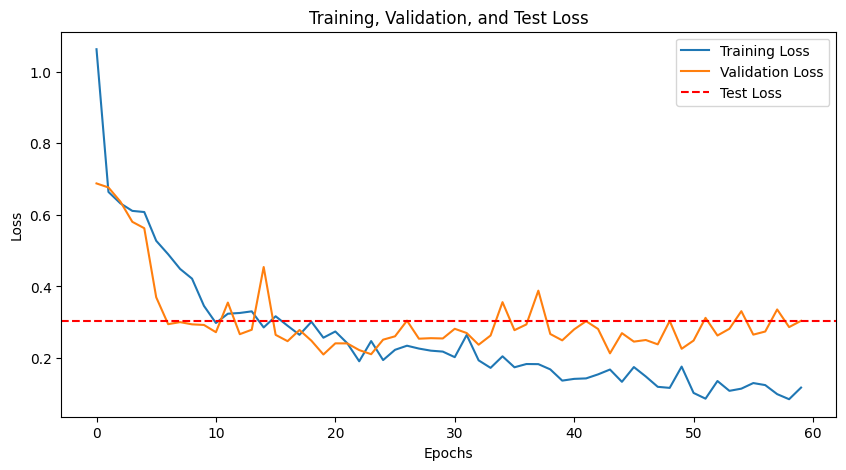

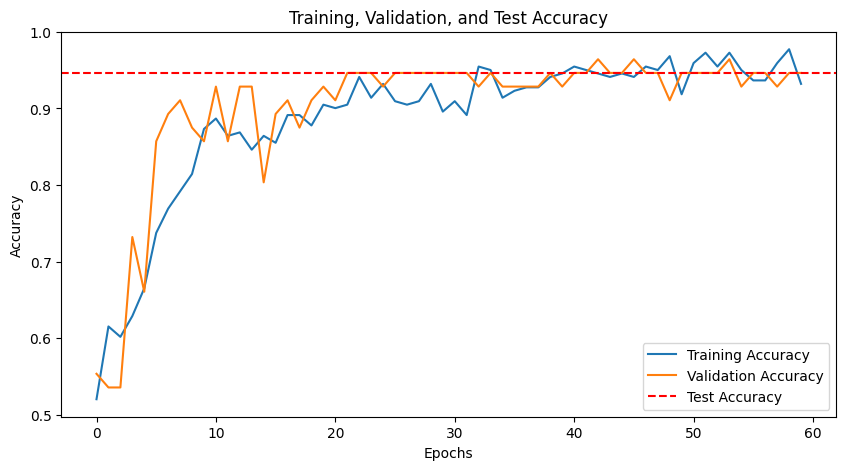

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 9ms/step


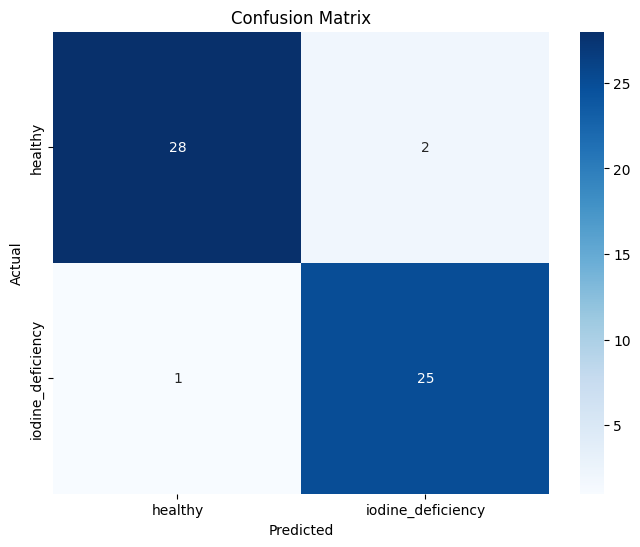

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iodine_deficiency_labels_dict.keys(),
            yticklabels=iodine_deficiency_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models_Enhanced_Accuracies/iodine_deficiency_enhanced_model/'

In [ ]:
# Save the model
model.save(save_model_folder + 'healthy_iodine_deficient_classification_enhanced_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models_Enhanced_Accuracies/iodine_deficiency_enhanced_model/healthy_iodine_deficient_classification_enhanced_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)


In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/iodine_deficient_baby_image_2.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in iodine_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 300ms/step
Predicted Class: iodine_deficiency


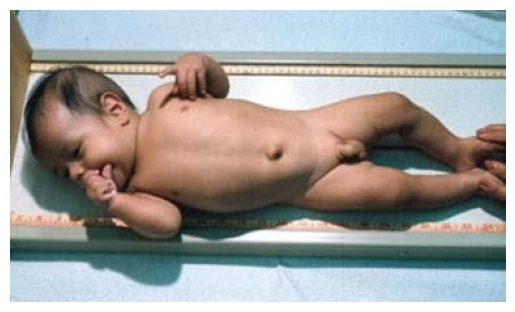

Predicted Class: iodine_deficiency


In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/iodine_deficient_baby_image_2.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Display the predicted class
for class_name, class_label in iodine_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")
